In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import math
import glob
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate, ShuffleSplit, LearningCurveDisplay
from sklearn import svm
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report

plt.style.use('default')
%matplotlib inline

In [20]:
# Загрузка матрицы признаков
feature_matrix =  pd.read_csv('feature_matrix_256.csv', na_values=["?"])
total_matrix = feature_matrix.copy()

total_matrix = feature_matrix.drop(columns = ['Unnamed: 0'])
total_matrix.head()

,Ax_MAV,Ax_CD,Ax_MAX,Ax_MIN,Ax_INIT,Ax_FNL,Ay_MAV,Ay_CD,Ay_MAX,Ay_MIN,...,RF_IEMG,RF_MAV,RF_LOG,RF_WL,RF_ACC,RF_DASDV,RF_ZC,RF_WAMP,RF_MYOP,Mode
0,-0.082788,0.194516,0.098621,-0.553145,-0.548947,-0.006729,0.193257,0.105025,0.482086,0.086829,...,0.659565,0.002199,0.057953,0.369797,0.001233,0.001564,52.0,0.0,0.0,0.0
1,-0.095318,0.186721,0.104413,-0.572925,0.038609,-0.461041,0.214915,0.111148,0.504380,0.085965,...,0.543723,0.001812,0.054427,0.403360,0.001345,0.001724,74.0,0.0,0.0,0.0
2,-0.164038,0.216013,0.100683,-0.585118,-0.002821,-0.013294,0.248497,0.134200,0.532462,0.075260,...,0.543924,0.001813,0.054203,0.387581,0.001292,0.001632,61.0,0.0,0.0,0.0
3,-0.114228,0.196493,0.093302,-0.561091,-0.556269,0.031456,0.211610,0.116422,0.498779,0.072621,...,0.499161,0.001664,0.052599,0.365358,0.001218,0.001510,67.0,0.0,0.0,0.0
4,-0.084593,0.157460,0.063919,-0.507791,0.005059,-0.077004,0.200574,0.114150,0.530889,0.082135,...,0.503382,0.001678,0.051411,0.385047,0.001283,0.001603,72.0,0.0,0.0,0.0


In [21]:
x_raw = total_matrix.copy()
y = x_raw['Mode']
x_raw = x_raw.copy().drop(columns=['Mode'])
rus = RandomUnderSampler()
x_raw, y = rus.fit_resample(x_raw, y)
print(x_raw[y==0].shape)
print(x_raw[y==1].shape)

(1782, 92)
(1782, 92)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_raw, y, test_size=0.2, random_state=42)
normalizer1 = preprocessing.StandardScaler()
X_train = pd.DataFrame(normalizer1.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(normalizer1.fit_transform(X_test), columns=X_test.columns)
clf_svm = svm.SVC(kernel = "poly", C = 0.01, gamma = 0.1)
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)

In [11]:
accuracy1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy1)

Accuracy: 0.9256716417910448


In [15]:
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy2)

Accuracy: 0.9083482765491133


In [19]:
accuracy3 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy3)

Accuracy: 0.8766796058524933


In [23]:
accuracy4 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy4)

Accuracy: 0.8677354709418837


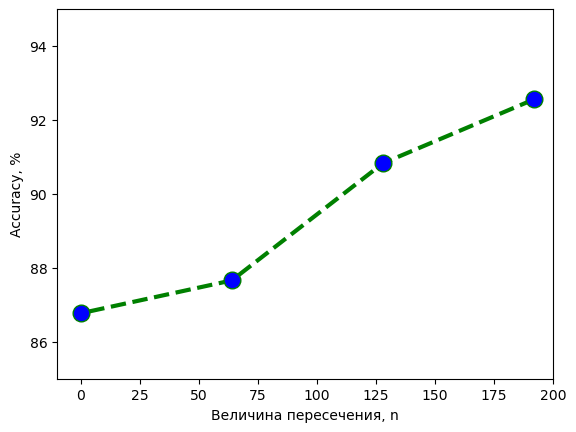

<Figure size 640x480 with 0 Axes>

In [40]:
plt.plot([192, 128, 64, 0], [92.56, 90.83, 87.66, 86.77], color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.ylabel('Accuracy, %')
plt.xlabel('Величина пересечения, n')
plt.axis((-10, 200, 85, 95))
plt.show()
plt.savefig('Window_size.png')